# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config_shared_kum.yml'

loaded_info = parse_config_for_analysis(config_path)



C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_shared_kum_rationalized.pt


GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cpu")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

## Perplexity and Accuracy

In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE

lm_RE.hard = True
lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1,)
#lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
#print(lm_result)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 62.50it/s]

{'mean_acc': {'mean': 0.33447280526161194, 'std': 0.0}, 'mean_perplexity': {'mean': 30.152910232543945, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.4951922595500946, 'std': 0.0}}


## Change in perplexity TODO

In [5]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

#Make sure we use the hard (binarized) values


rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(40.1968, device='cuda:0'), 'rel_average': tensor(0.4091, device='cuda:0'), 'abs_pos_count': Counter({0.0: 12854, 9.0: 264, 8.0: 251, 6.0: 244, 4.0: 241, 16.0: 238, 10.0: 237, 5.0: 235, 14.0: 232, 11.0: 230, 7.0: 229, 13.0: 227, 15.0: 223, 3.0: 221, 12.0: 216, 2.0: 212, 17.0: 206, 21.0: 204, 24.0: 203, 19.0: 202, 22.0: 201, 26.0: 200, 35.0: 192, 18.0: 191, 23.0: 190, 20.0: 185, 34.0: 184, 28.0: 183, 31.0: 182, 25.0: 181, 30.0: 180, 36.0: 176, 27.0: 175, 41.0: 167, 29.0: 163, 33.0: 163, 59.0: 158, 42.0: 157, 43.0: 157, 51.0: 156, 40.0: 153, 39.0: 151, 45.0: 151, 53.0: 150, 54.0: 147, 38.0: 146, 32.0: 146, 44.0: 144, 55.0: 144, 37.0: 143, 48.0: 143, 65.0: 143, 47.0: 141, 64.0: 141, 63.0: 135, 68.0: 132, 49.0: 129, 50.0: 126, 46.0: 125, 56.0: 125, 57.0: 124, 67.0: 120, 52.0: 117, 80.0: 117, 72.0: 110, 76.0: 110, 73.0: 107, 58.0: 106, 61.0: 106, 75.0: 104, 85.0: 104, 60.0: 102, 82.0: 102, 79.0: 102, 71.0: 100, 74.0: 100, 90.0: 99, 62.0: 96, 78.0: 96, 69.0: 94, 87.0: 9

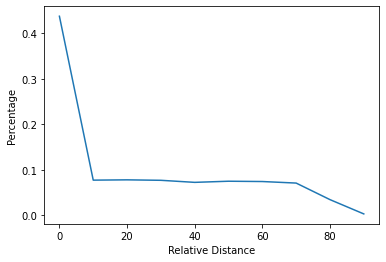

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 10 artists>

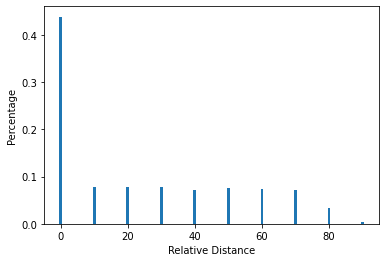

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

## Analysing some examples

In [9]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [10]:
## First with greedy rationals
completed_dialogue = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)


In [11]:
from utils.analysis import pretty_print_completed_dialogues
pretty_print_completed_dialogues(completed_dialogue)

context ----> response
how are you doing ? ------> [SEP] you ' re right , but you ’ re
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] right , but you ’ re ------> getting up . [SEP] i ' ve got my best
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] [MASK] [SEP] i ' ve got my best ------> . [SEP] what are you going to do ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ’ [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ' ve got my best . [SEP] what are you going to do ? [SEP] ------> i am not sure . what do you want ,
what did you do today ? ------> [SEP] i ' m going to play english . [SEP]
[MASK] [MASK] [MASK] do today ? [SEP] i ' m going to play english . [SEP] ------> i ' m glad you like my parents . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] i ' m glad you like my parents . [SEP] ------> i kn

In [13]:
completed_dialogue

[{'completed_dialogue': "how are you doing ? [SEP] you ' re right , but you ’ re getting up . [SEP] i ' ve got my best . [SEP] what are you going to do ? [SEP] i am not sure . what do you want ,",
  'rationals': [tensor([]),
   tensor([False, False, False, False, False, False, False, False, False,  True,
            True,  True,  True,  True,  True], device='cuda:0'),
   tensor([False, False, False, False, False, False, False, False, False, False,
           False, False, False,  True, False, False, False, False,  True,  True,
            True,  True,  True,  True,  True], device='cuda:0'),
   tensor([False, False, False, False, False, False, False, False, False, False,
           False, False, False,  True, False, False, False, False, False, False,
            True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
            True,  True,  True,  True,  True], device='cuda:0')],
  'rationalized_input': ['how are you doing ?',
   '[MASK] [MASK] [MASK] [MASK] [MASK] [MASK]